In [2]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
daily_Data= pd.read_csv("/home/ayush/Documents/machine_learning/pokemon-stat/Pokemon.csv")

In [4]:
daily_Data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
daily_Data.shape

(800, 13)

In [6]:
#correcting the names for mega evolved pokemons

In [7]:
daily_Data.Name = daily_Data.Name.str.replace(".*(?=Mega)", "")

In [8]:
daily_Data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
daily_Data["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [10]:
daily_Data["Type 2"].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [11]:
daily_Data["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [12]:
daily_Data["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Ice         14
Water       14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [13]:
daily_Data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [14]:
#as there are nan values present in Type,we need to remove them by copying the type 1 in nan of type 2

In [15]:
daily_Data['Type 2'].fillna(daily_Data['Type 1'], inplace=True)

In [16]:
daily_Data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [17]:
#now we will see the percentage of pokemon type1 wise

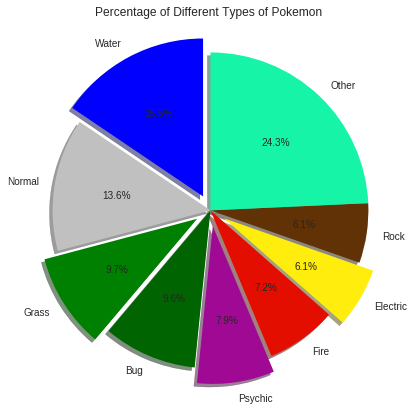

In [18]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['B', 'silver', 'G', '#006400', '#A00994', '#E40E00', '#FFED0D', '#613205', '#16F5A7']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0.0, 0.1, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

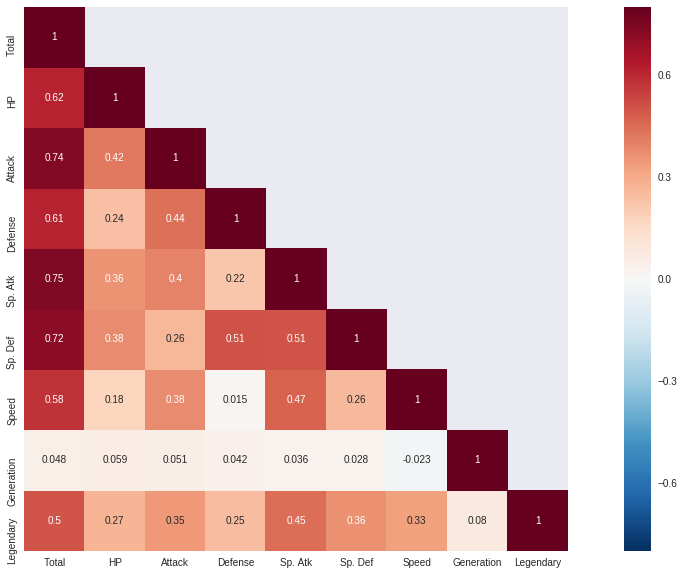

In [19]:
#correlation
corrMatt = daily_Data[['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [20]:
#we can also see that there is very less or no correlation between Generation and other variables, so we'll drop it.

In [21]:
#daily_Data.drop("Generation",1,inplace=True)
#but for now lets just keep it.

In [22]:
#while 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed' are highly correlated to total.

In [23]:
# now we will see visualization oof entire data:

In [24]:
new_Data=daily_Data.copy()
new_Data.drop(["#","Total","Generation","Legendary"],1,inplace=True)
new_Data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,Fire,39,52,43,60,50,65


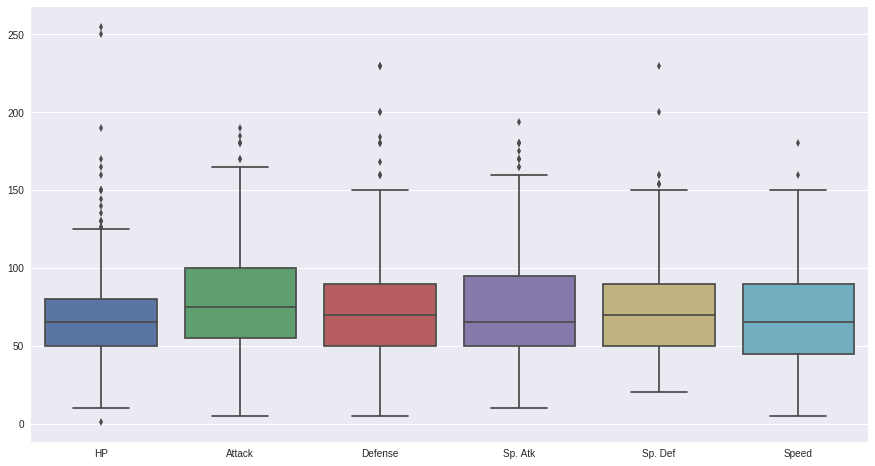

In [25]:
figure = plt.figure(figsize=(15,8))
sn.boxplot(data=new_Data)

In [26]:
# now visualization on the basis of type1:

In [27]:
# creating a function mean_attribute, which will take attribute such as Desfense,Attack,etc and group them by type
# and will take the mean of each and plot a bar plot in ax=axes2


In [28]:
def mean_attribute(type_no,attribute,dataframe):
    a=dataframe.groupby(type_no)[attribute].mean()
    df=pd.DataFrame(a)
    df=df.reset_index()
    df = df.sort_values(by=[attribute])
    fig, axes = plt.subplots(3,1)
    fig.set_size_inches(12, 10)
    sn.stripplot(data=daily_Data,x="Type 1",y="Total",ax=axes[0],jitter=True)
    sn.boxplot(data=daily_Data,y="Total",x="Type 1",orient="v",ax=axes[1])
    sn.barplot(df[type_no],df[attribute],ax=axes[2])
    

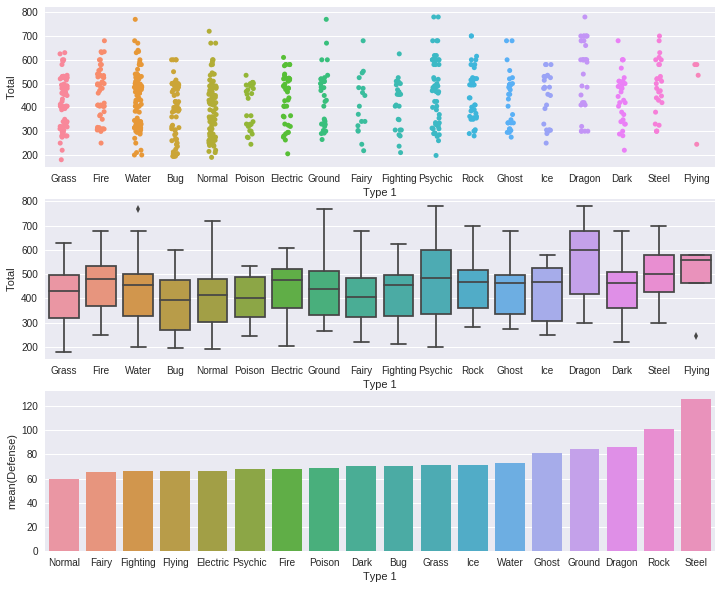

In [29]:
mean_attribute("Type 1","Defense",daily_Data)

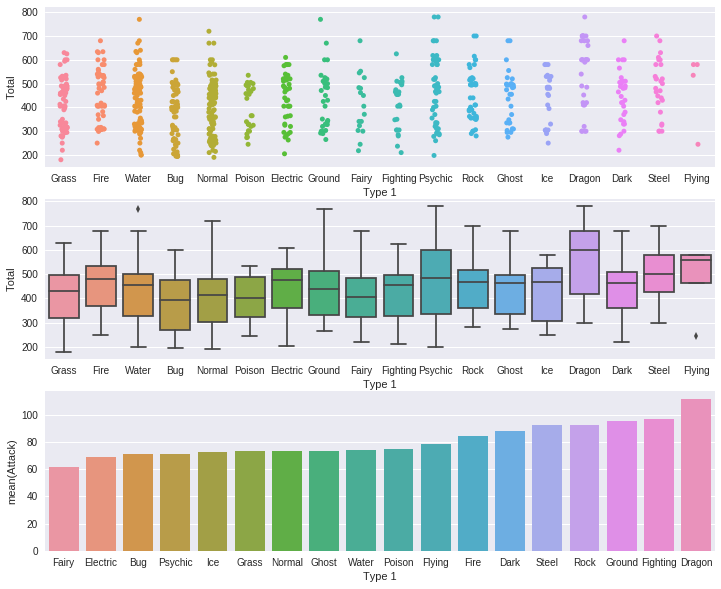

In [30]:
mean_attribute("Type 1","Attack",daily_Data)

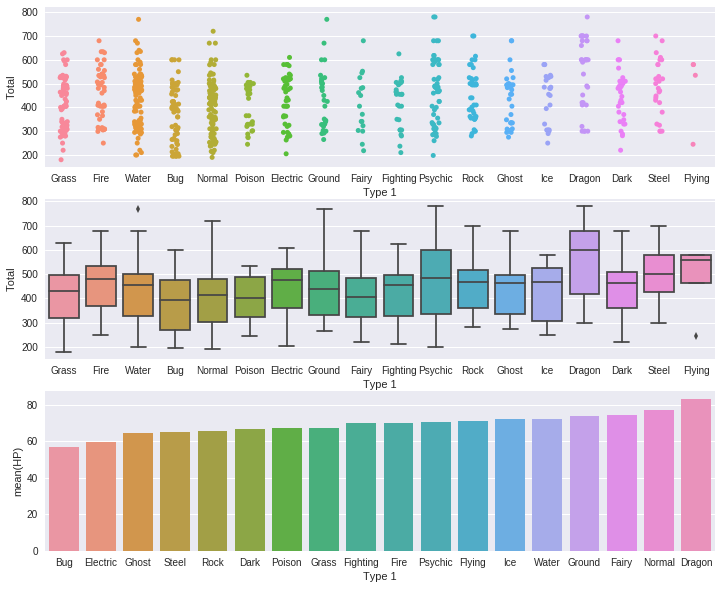

In [31]:
mean_attribute("Type 1","HP",daily_Data)

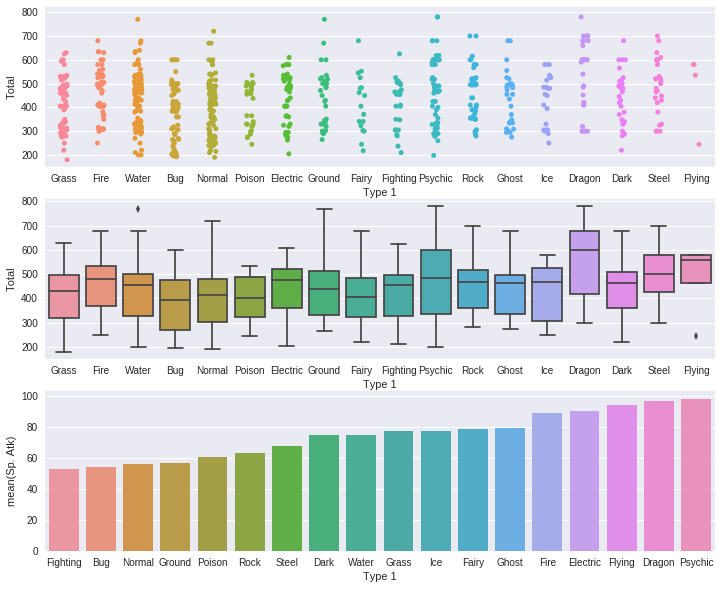

In [32]:
mean_attribute("Type 1","Sp. Atk",daily_Data)

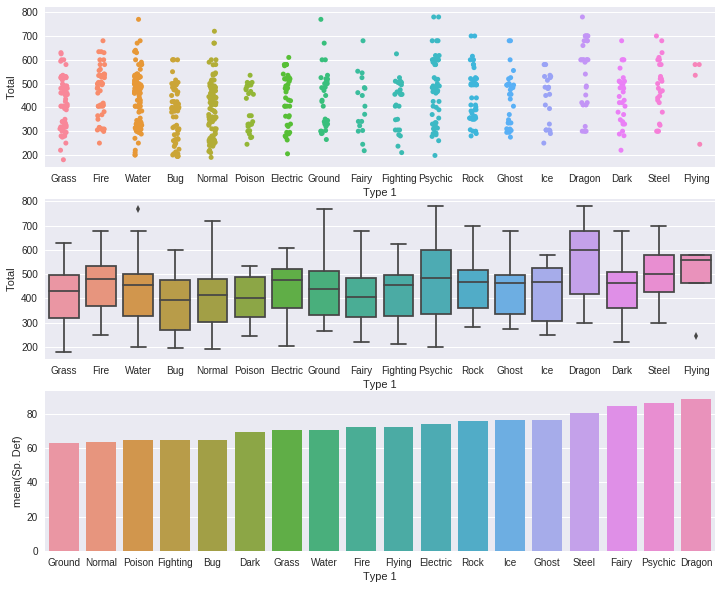

In [33]:
mean_attribute("Type 1","Sp. Def",daily_Data)

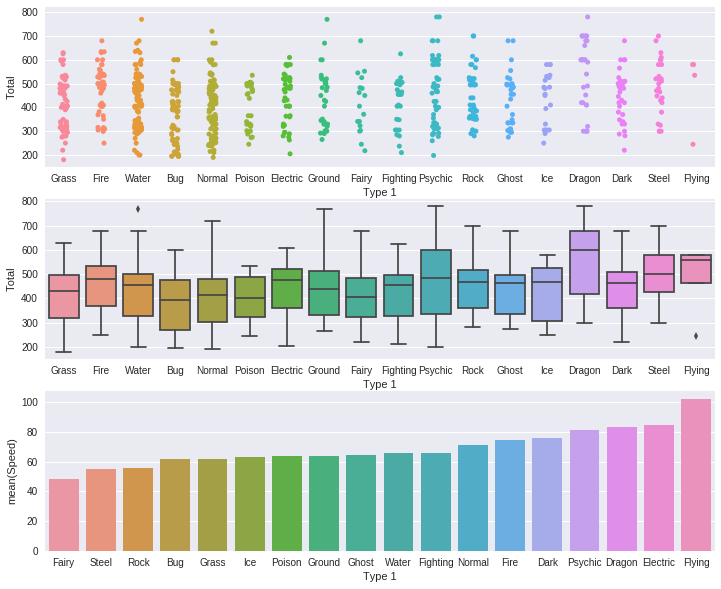

In [34]:
mean_attribute("Type 1","Speed",daily_Data)

In [35]:
# similarly you can go for type2 also.

In [36]:
#checking if Generation has any effect on total

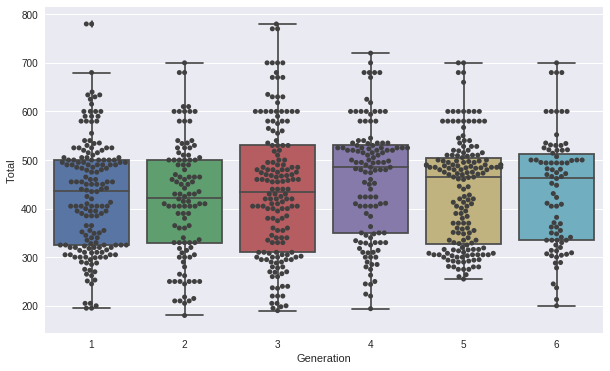

In [37]:
figure = plt.figure(figsize=(10,6))
sn.boxplot(y="Total", x="Generation", data=daily_Data)
ax = sn.swarmplot(x="Generation", y="Total", data=daily_Data, color=".25")

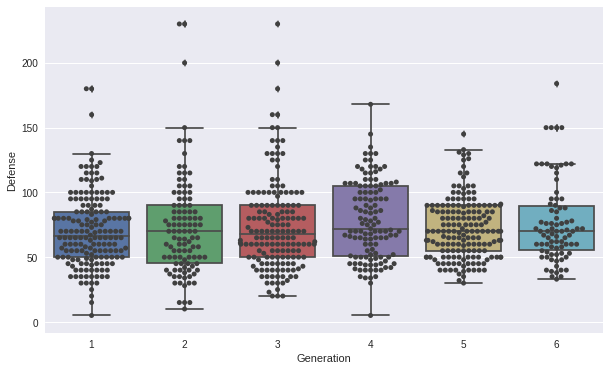

In [38]:
figure = plt.figure(figsize=(10,6))

sn.boxplot(y="Defense", x="Generation", data=daily_Data)
ax = sn.swarmplot(x="Generation", y="Defense", data=daily_Data, color=".25")

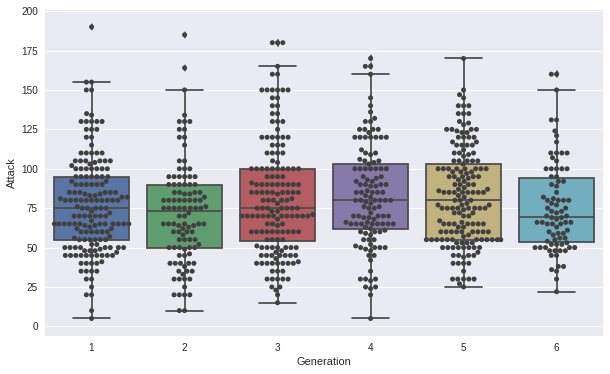

In [39]:
figure = plt.figure(figsize=(10,6))

sn.boxplot(y="Attack", x="Generation", data=daily_Data)
ax = sn.swarmplot(x="Generation", y="Attack", data=daily_Data, color=".25")

In [40]:
# you can see there is no such correlation between generation and other as seen in correation heat map above.

In [41]:
# but number of pokemon of each type depend on generation as seen below:

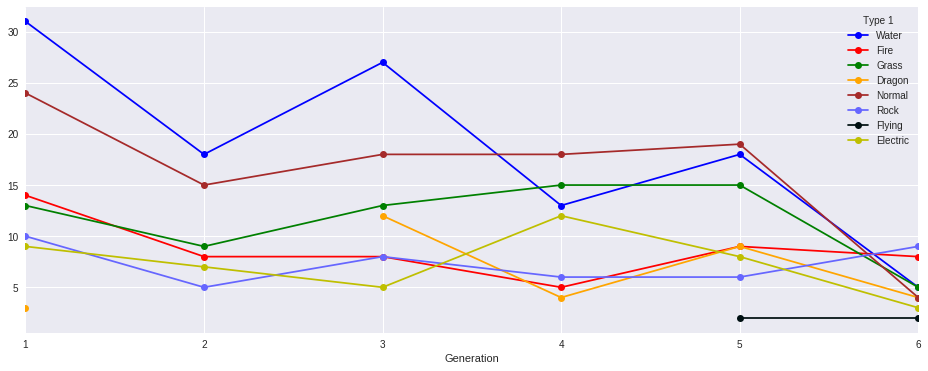

In [42]:
a=daily_Data.groupby(['Generation','Type 1']).count().reset_index()
a=a[['Generation','Type 1','Total']]
a=a.pivot('Generation','Type 1','Total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

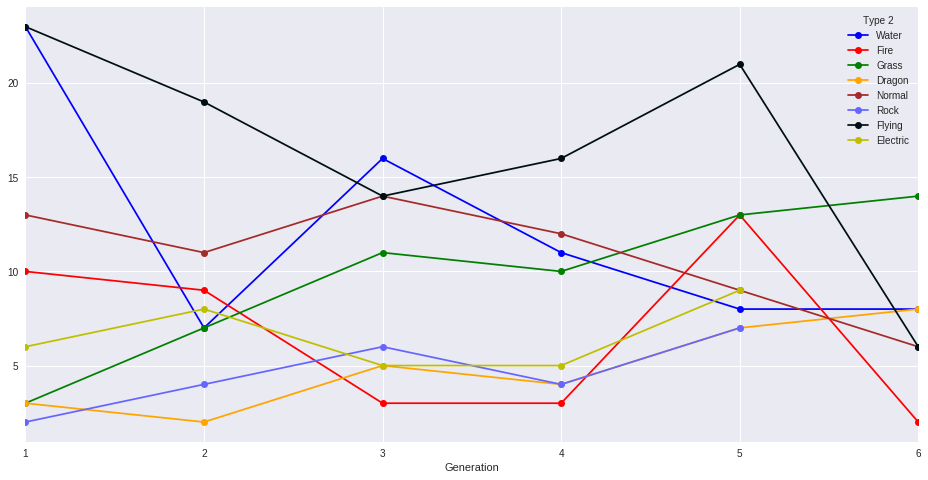

In [43]:
a=daily_Data.groupby(['Generation','Type 2']).count().reset_index()
a=a[['Generation','Type 2','Total']]
a=a.pivot('Generation','Type 2','Total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

In [44]:
#now lets check Legendary has any effect on our data

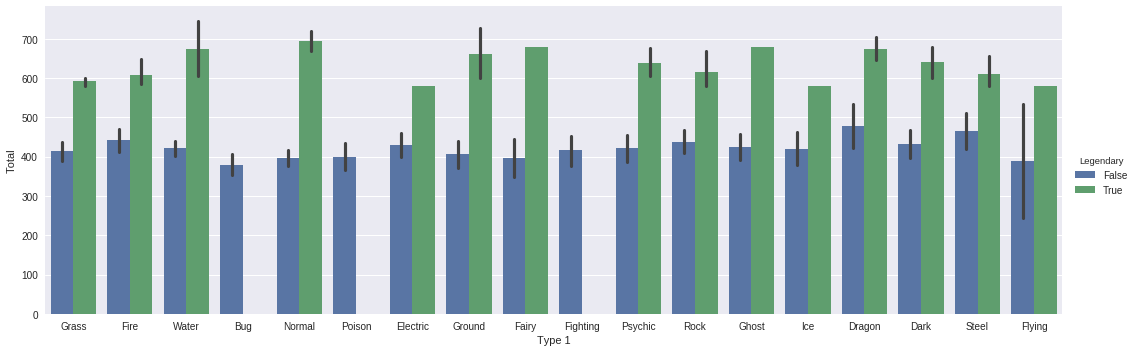

In [45]:
sn.factorplot(x="Type 1", y="Total", hue="Legendary",data=daily_Data, kind="bar",aspect=3,size=5)

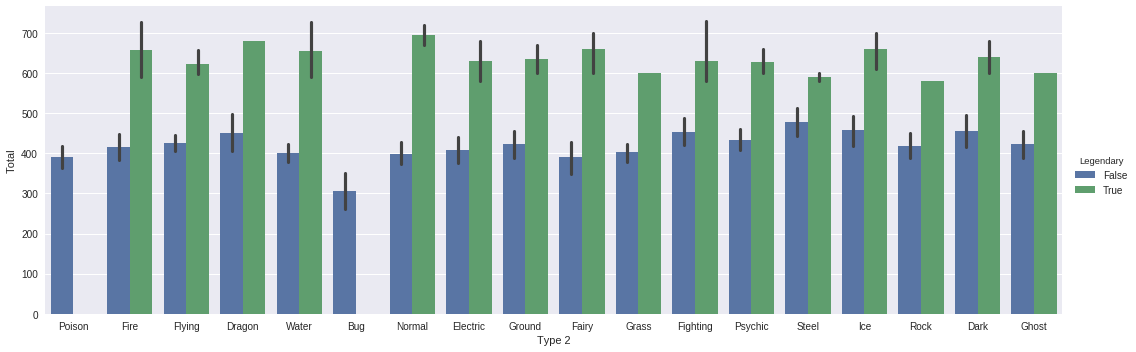

In [46]:
sn.factorplot(x="Type 2", y="Total", hue="Legendary",data=daily_Data, kind="bar",aspect=3,size=5)

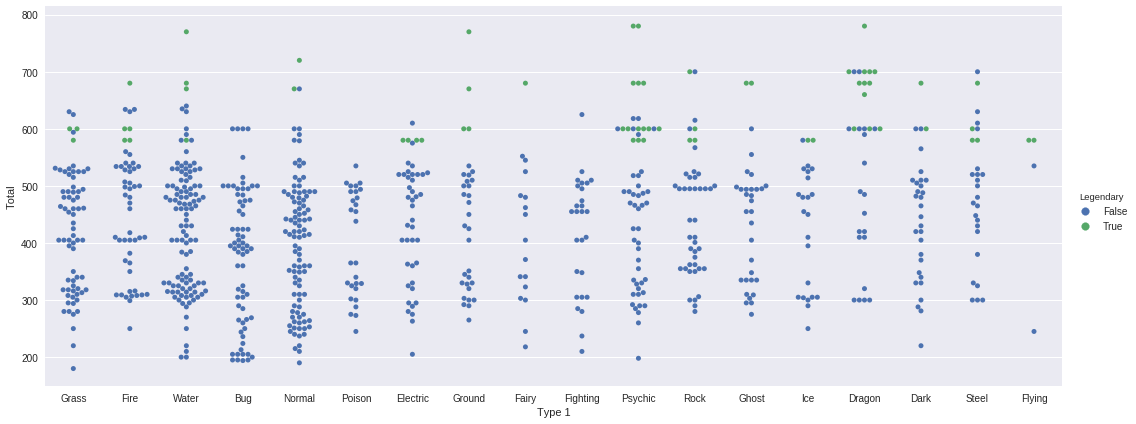

In [47]:
sn.factorplot(x="Type 1", y="Total", hue="Legendary",data=daily_Data, kind="swarm",aspect=2.5,size=6)

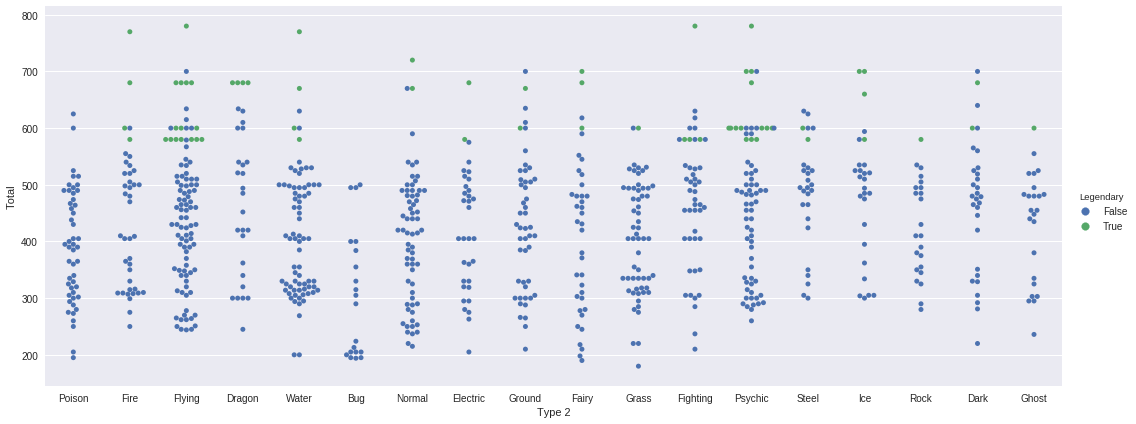

In [48]:
sn.factorplot(x="Type 2", y="Total", hue="Legendary",data=daily_Data, kind="swarm",aspect=2.5,size=6)

In [49]:
# we can see that generally Legendary pokemons have more total than any of non legendary pokemon
#therefore we can not discard Legendary from data.

In [50]:
# now if you want to compare two pokemons, you can do so by:

In [51]:
daily_Data = daily_Data.set_index('Name')

In [55]:
pokemon1="Mega Charizard X"
pokemon2="Bulbasaur"

In [56]:
TYPE_LIST = ['Grass','Fire','Water','Bug','Normal','Poison',
            'Electric','Ground','Fairy','Fighting','Psychic',
            'Rock','Ghost','Ice','Dragon','Dark','Steel','Flying']

COLOR_LIST = ['#8ED752', '#F95643', '#53AFFE', '#C3D221', '#BBBDAF', '#AD5CA2', 
              '#F8E64E', '#F0CA42', '#F9AEFE', '#A35449', '#FB61B4', '#CDBD72', 
              '#7673DA', '#66EBFF', '#8B76FF', '#8E6856', '#C3C1D7', '#75A4F9']

# The colors are copied from this script: https://www.kaggle.com/ndrewgele/d/abcsds/pokemon/visualizing-pok-mon-stats-with-seaborn
# The colors look reasonable in this map: For example, Green for Grass, Red for Fire, Blue for Water...
COLOR_MAP = dict(zip(TYPE_LIST, COLOR_LIST))


In [57]:
#color for pokemon 1
type1=daily_Data.loc[pokemon1]["Type 1"]
color1=COLOR_MAP[type1]
color1

'#F95643'

In [58]:
#color for pokemon 2
type1=daily_Data.loc[pokemon2]["Type 1"]
color2=COLOR_MAP[type1]
color2

'#8ED752'

In [59]:
#barplots for easy comparision of two pokemon

****Comparision of Mega Charizard X and Bulbasaur****


Mega Charizard X is not legendary
Bulbasaur is not legendary


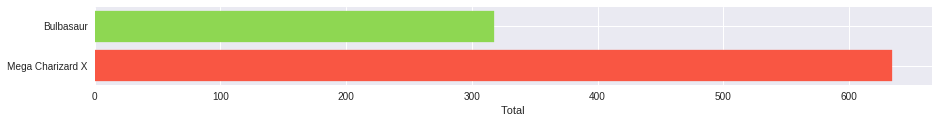

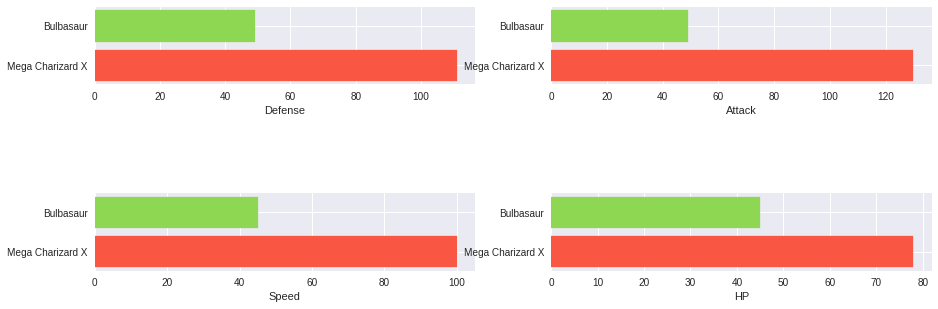

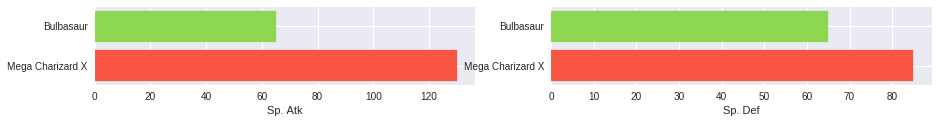

In [60]:
print("****Comparision of "+pokemon1+" and "+pokemon2+"****")
#to check whether a pokemon is legendary or not
leg1=daily_Data.loc[pokemon1]["Legendary"]
leg2=daily_Data.loc[pokemon2]["Legendary"]
print("\n")
if leg1:
    print(pokemon1+" is legendary")
else:
    print(pokemon1+" is not legendary")
if leg2:
    print(pokemon2+" is legendary")
else:
    print(pokemon2+" is not legendary")


#to plot the Total
fig = plt.figure(figsize=(15,10))
objects = (pokemon1,pokemon2)
y_pos = np.arange(len(objects))
plt.subplot(611)
objects = (pokemon1,pokemon2)
y_pos = np.arange(len(objects))

a=daily_Data.loc[pokemon1]["Total"]
b=daily_Data.loc[pokemon2]["Total"]
performance = [a,b]

barlist=plt.barh(y_pos, performance)

barlist[0].set_color(color1)
barlist[1].set_color(color2)
plt.yticks(y_pos, objects)
plt.xlabel('Total')
plt.show()

#to plot 4 more graphs
fig = plt.figure(figsize=(15,10))
objects = (pokemon1,pokemon2)
y_pos = np.arange(len(objects))
plt.subplot(621)
a=daily_Data.loc[pokemon1]["Defense"]
b=daily_Data.loc[pokemon2]["Defense"]
performance = [a,b]

barlist=plt.barh(y_pos, performance)

barlist[0].set_color(color1)
barlist[1].set_color(color2)
plt.yticks(y_pos, objects)
plt.xlabel('Defense')

plt.subplot(622)
a=daily_Data.loc[pokemon1]["Attack"]
b=daily_Data.loc[pokemon2]["Attack"]
performance = [a,b]

barlist=plt.barh(y_pos, performance)

barlist[0].set_color(color1)
barlist[1].set_color(color2)
plt.yticks(y_pos, objects)
plt.xlabel('Attack')

plt.subplot(625)
a=daily_Data.loc[pokemon1]["Speed"]
b=daily_Data.loc[pokemon2]["Speed"]
performance = [a,b]

barlist=plt.barh(y_pos, performance)

barlist[0].set_color(color1)

barlist[1].set_color(color2)

plt.yticks(y_pos, objects)

plt.xlabel('Speed')


plt.subplot(626)
a=daily_Data.loc[pokemon1]["HP"]
b=daily_Data.loc[pokemon2]["HP"]
performance = [a,b]

barlist=plt.barh(y_pos, performance)

barlist[0].set_color(color1)

barlist[1].set_color(color2)
plt.yticks(y_pos, objects)
plt.xlabel('HP')
plt.show()

fig = plt.figure(figsize=(15,10))
objects = (pokemon1,pokemon2)
y_pos = np.arange(len(objects))

#to plot rest 2
plt.subplot(623)
a=daily_Data.loc[pokemon1]["Sp. Atk"]
b=daily_Data.loc[pokemon2]["Sp. Atk"]
performance = [a,b]

barlist=plt.barh(y_pos, performance)

barlist[0].set_color(color1)

barlist[1].set_color(color2)

plt.yticks(y_pos, objects)


plt.xlabel('Sp. Atk')

plt.subplot(624)
a=daily_Data.loc[pokemon1]["Sp. Def"]
b=daily_Data.loc[pokemon2]["Sp. Def"]
performance = [a,b]

barlist=plt.barh(y_pos, performance)

barlist[0].set_color(color1)

barlist[1].set_color(color2)

plt.yticks(y_pos, objects)
plt.xlabel('Sp. Def')
plt.show()

In [61]:
#Radar chart for comparision of two pokemons

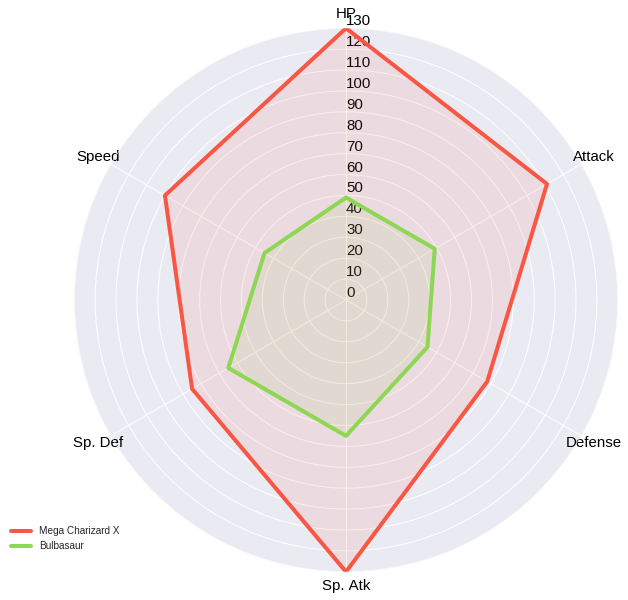

In [62]:
pok1=daily_Data.loc[pokemon1]
pok2=daily_Data.loc[pokemon2]
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
fig = plt.figure(figsize=(10, 10))
# Set data
df = pd.DataFrame({
'group': ['A','B'],
'HP': [pok1["HP"], pok2["HP"]],
'Attack': [pok1["Attack"], pok2["Attack"]],
'Defense': [pok1["Defense"], pok2["Defense"]],
'Sp. Atk': [pok1["Sp. Atk"], pok2["Sp. Atk"]],
'Sp. Def': [pok1["Sp. Def"], pok2["Sp. Def"]],
'Speed': [pok1["Speed"], pok2["Speed"]]
})

#maximum among all
maximum=max([pok1["Attack"], pok2["Attack"],pok1["Defense"], pok2["Defense"],pok1["Sp. Atk"], pok2["Sp. Atk"],
pok1["Sp. Def"], pok2["Sp. Def"],pok1["Speed"], pok2["Speed"]])
 
# ------- PART 1: Create background
 
# number of variable
categories=['HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed']
N = len(categories)
#to select the range, means till where the graph can go for a variable.
aa=[]
aaa=[]
for i in range(maximum):
    aa.append(i*10)
    aaa.append(str(i*10))

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,size=15,color="black")



# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(aa, aaa, color="black", size=15)
plt.ylim(0,maximum)


 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pokemon1,color=color1)
ax.fill(angles, values, color1, alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pokemon2,color=color2)
ax.fill(angles, values, color2, alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [63]:
# i have made this function to see can we predict a pokemon on basis of 2 attributes:

In [64]:
daily_Data_new= daily_Data.copy()
daily_Data_new["Special_attack"]=daily_Data["Sp. Atk"]
df = daily_Data_new.copy()

In [65]:
def scatter_plots(Type,attribute1,attribute2,color,marker,size,df):
    for i in range(len(Type)):
        Type[i]=df[(df['Type 1']==Type[i]) | ((df['Type 2'])==Type[i])]
        plt.scatter(Type[i][attribute1],Type[i][attribute2] ,color=color[i],label=Type[i],marker=marker[i],s=size[i])
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    #plt.legend()
    plt.plot()
    fig=plt.gcf()  #get the current figure using .gcf()
    fig.set_size_inches(20,10) #set the size for the figure
    plt.show()


In [70]:
# adjust the variables from here:

Type=['Fire','Water','Electric','Grass']  # specify type as in dataframe
attribute1="HP"
attribute2="Special_attack"
color=['R','B','Y','G']  # you can give any color of your choice
marker=['o','o','o','o'] # go to https://matplotlib.org/api/markers_api.html to get more markers.
size=[30,30,30,30]

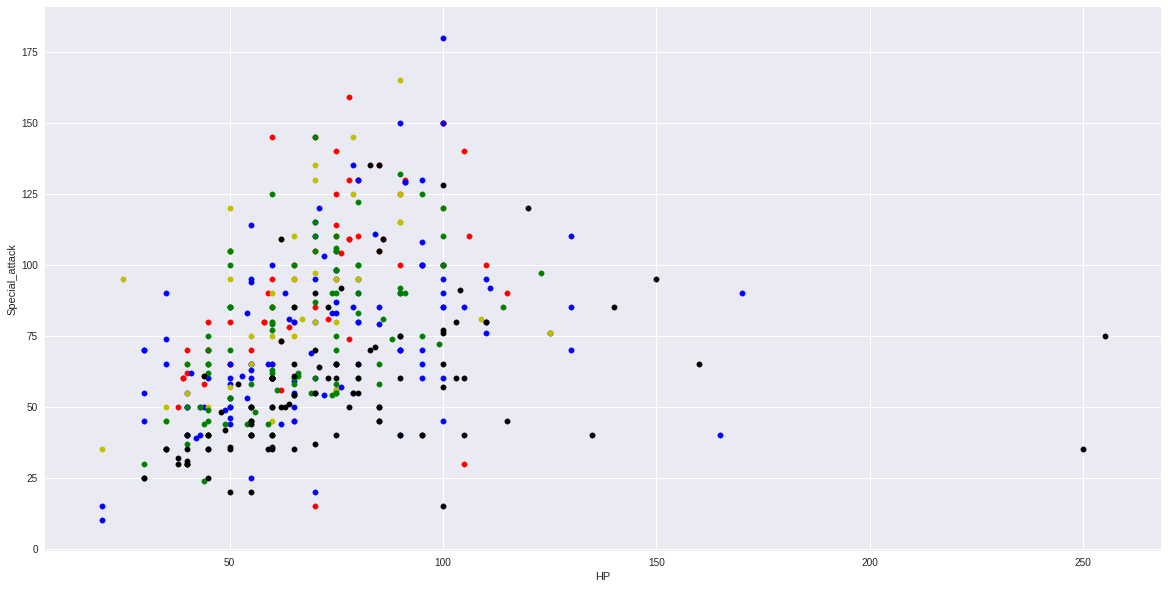

In [67]:
scatter_plots(Type,attribute1,attribute2,color,marker,size,df)

In [68]:
#thankyou